# Homework 11

## ASTR 5900, Fall 2017, University of Oklahoma

### More Regression

# Problem 1

Polymer dielectrics have many applications such as in organic photovoltaics and wearable electronics.  One property that a polymer should have as a dielectric is a high bandgap energy.  There are two compounding difficulties in searching for polymer candidates for these technologies: the volume of chemical space is vast and the evaluation of material properties via *ab initio* methods are computationally expensive.  However it is possible to build a model to  predict the properties of polymers using regression, a supervised learning method.

In this problem we will perform regression on the bandgap energy of certain polymers.  The data is located in `polymers.csv`.  Featured are 284 unique 4-block materials composed of 7 different molecular building blocks: $CH_2$, $NH$, $CO$, $C_6 H_4$, $C_4 H_2 S$, $CS$, and $O$.  The polymers are understood to repeat indefinitely.

### Part A

The choice of how data is represented is an important part of machine learning.  One such representation of our molecule data is the $M_{II}$ fingerprint, which is a normalized count of the number of different types of pairs of building blocks in a polyer.  The representation is therefore a $7 \times 7$ matrix with these specifications:

1. The sum of all elements in the matrix should be equal to 4 (since we are dealing with 4-block materials) $$ \sum^7_{i,j} M_{ij} = 4$$
2. The sum of elemnents in any row or column of $M$ should be equal to the total number of blocks of that kind in the polymer.
3. The period symmetry in the polymer dictates that $M$ is a symmetric matrix.  In other words, polymers have the same bandgap energy if they are mirrored.
4. The diagonal elements of $M$ are integers.

Transform the data from `polymers.csv` so that each molecule is represented in the $M_{II}$ fingerprint.

In [1]:
import numpy as np
data=np.genfromtxt('polymers.csv',delimiter=',',skip_header=1,dtype=None,names=('number','4_Block_Polymer','ignored','E_Diel_const','I_Diel_const','tot_Diel_const','HSE_Band_Gap'))


In [2]:
data

array([(1, 'CH2-CO-NH-CS', False, 3.332, 1.017, 4.349, 3.06),
       (2, 'CH2-CS-C6H4-O', False, 3.572, 0.467, 4.039, 2.531),
       (3, 'C6H4-C6H4-C4H2S-CS', False, 5.391, 0.37, 5.761, 1.799),
       (4, 'CO-O-C4H2S-CS', False, 3.784, 0.879, 4.663, 2.25),
       (5, 'C6H4-CS-C4H2S-O', False, 3.616, 0.517, 4.133, 2.522),
       (6, 'CO-C6H4-O-CS', False, 3.988, 0.738, 4.726, 2.308),
       (7, 'C6H4-O-CS-C4H2S', False, 4.258, 0.532, 4.791, 2.238),
       (8, 'C6H4-C4H2S-C6H4-C4H2S', False, 3.928, 0.11, 4.037, 2.328),
       (9, 'NH-C4H2S-CO-C4H2S', False, 5.804, 1.674, 7.478, 1.858),
       (10, 'CH2-NH-C4H2S-CS', False, 4.637, 1.065, 5.703, 1.828),
       (11, 'NH-C6H4-CO-C6H4', False, 3.374, 0.412, 3.786, 3.743),
       (12, 'NH-CO-CS-C4H2S', False, 5.404, 2.361, 7.764, 1.43),
       (13, 'CO-C6H4-O-C4H2S', False, 3.573, 0.78, 4.354, 3.28),
       (14, 'C6H4-CS-C4H2S-CS', False, 5.469, 0.591, 6.06, 1.384),
       (15, 'CH2-C4H2S-NH-C4H2S', False, 3.279, 0.295, 3.574, 3.712),
       (

In [3]:
blocks=['CH2','NH','CO','C6H4','C4H2S','CS','O']
Matrix=np.zeros((7,7,284))
BandGap=np.zeros((1,284))
b=0
print blocks.index('CH2')
for datum in data:
    polymer, bg = datum[1],datum[-1]
    polymer = polymer.split('-')
    a=np.zeros((7,7))
    
    point1=blocks.index(polymer[0])
    point2=blocks.index(polymer[1])
    point3=blocks.index(polymer[2])
    point4=blocks.index(polymer[3])
    
    a[point1,point2]+=1
    a[point2,point1]+=1
    a[point2,point3]+=1
    a[point3,point2]+=1
    a[point3,point4]+=1
    a[point4,point3]+=1
    a[point4,point1]+=1
    a[point1,point4]+=1
    
    a=a/2.
    
    Matrix[:,:,b]=a
    BandGap[0,b]=bg
    b+=1
    
print Matrix[:,:,0]
print BandGap

    
    


0
[[ 0.   0.   0.5  0.   0.   0.5  0. ]
 [ 0.   0.   0.5  0.   0.   0.5  0. ]
 [ 0.5  0.5  0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0. ]
 [ 0.5  0.5  0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0. ]]
[[ 3.06   2.531  1.799  2.25   2.522  2.308  2.238  2.328  1.858  1.828
   3.743  1.43   3.28   1.384  3.712  2.599  3.338  2.222  2.959  3.453
   2.893  2.142  3.225  3.024  2.418  1.615  2.91   4.261  1.785  3.17
   2.495  2.061  1.98   4.515  2.246  4.123  1.887  2.633  3.402  3.072
   2.166  3.894  2.482  2.913  1.744  2.382  3.829  0.935  4.033  2.597
   2.242  2.942  5.035  7.701  1.983  3.961  3.717  4.206  2.257  3.092
   3.981  3.986  3.609  3.828  7.187  2.666  3.498  3.004  4.298  3.893
   1.728  4.416  2.323  3.471  2.103  3.574  2.891  3.676  3.446  2.526
   2.388  3.606  2.041  4.782  3.267  1.941  3.83   6.838  2.385  3.078
   3.908  2.267  2.376  1.997  5.014  1.289  3.999  2.939  3.488  3.913
   2.248  2.

### Part B

Perform Kernel Ridge Regression on the data using `sklearn.kernel_ridge.KernelRidge`.  Use a Gaussian kernel with a width ($\sigma$) of 25.  Use an alpha parameter of $10^{-5}$.

You must define your own Gaussian kernel that goes like $$ k(\vec{x}, \vec{v}) = \exp\left( -\frac{1}{2\sigma^2} || \vec{x} - \vec{v}||^2\right)$$
Read this link on `KernelRidge` objects to understand how to implement it: http://scikit-learn.org/stable/modules/generated/sklearn.kernel_ridge.KernelRidge.html#sklearn.kernel_ridge.KernelRidge

Use the first 200 data points to train your model, then the remaining 84 to test it.  Calculate the standard error of the test set.  Plot the model values of the data points against their target values, and color each point according to its membership in the test or training set.  Use appropriate labels.


In [4]:
print BandGap.min()
print BandGap.max()
print BandGap.shape

0.935
8.606
(1, 284)


In [5]:
Matrix=np.reshape(Matrix,(49,284))


In [6]:
training_set_M=Matrix[:,:200]
training_set_BG = BandGap[0,:200]

training_set_M=training_set_M.T


test_set_M=Matrix[:,200:]
test_set_BG=BandGap[0,200:]

test_set_M=test_set_M.T


print test_set_M.shape
print test_set_BG.shape

(84, 49)
(84,)


In [7]:
def gaussian(x,v):
    return np.exp(-0.5 * np.dot((x-v),(x-v))/25**2)

In [8]:
from sklearn.kernel_ridge import KernelRidge

In [9]:
ridge = KernelRidge(alpha=0.0001,kernel=gaussian)
ridge.fit(training_set_M,training_set_BG)


KernelRidge(alpha=0.0001, coef0=1, degree=3, gamma=None,
      kernel=<function gaussian at 0x7fc83c0e2230>, kernel_params=None)

In [10]:
from matplotlib import pyplot as plt
y_ridge=ridge.predict(training_set_M)
print y_ridge.shape
y_ridge_test=ridge.predict(test_set_M)

(200,)


In [12]:
print 'standard error is', np.std(y_ridge_test-test_set_BG)

standard error is 0.529452300699


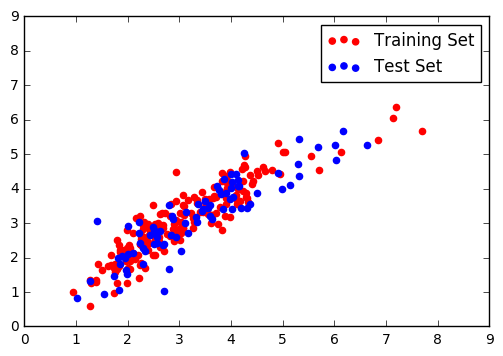

In [13]:
plt.scatter(training_set_BG,y_ridge,color='r',label='Training Set')
plt.scatter(test_set_BG,y_ridge_test,color='b',label='Test Set')
plt.legend()
plt.show()



# Problem 2

Now we will be performing Gaussian Process Regression on the same polymer data from Problem 1.

Use an `sklearn.model_selection.GridSearchCV` object to optimize the hyperparameters of an `sklearn.gaussian_process.GaussianProcessRegressor` object applied to the polymer data.  Use the same split as before to train, then test the model.  Plot the model and true results as in Problem 1, and determine the error.  Comment on your results and compare to Problem 1.

There are examples on the sci-kit learn website on how to use `GridSearchCV`, however they are applied to other models such as `KernelRidge`.  The concept is the same, so you should be able to figure out how to use them for our GP objects.  One such example is here: http://scikit-learn.org/stable/auto_examples/gaussian_process/plot_compare_gpr_krr.html#sphx-glr-auto-examples-gaussian-process-plot-compare-gpr-krr-py

In [15]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.gaussian_process.kernels import ExpSineSquared,RBF


param_grid= {"alpha": [1e0, 1e-1, 1e-2, 1e-3],
              "kernel": [RBF(l)
                         for l in np.logspace(-2, 2,10)]}



In [16]:
kr = GridSearchCV(GaussianProcessRegressor(), cv=5, param_grid=param_grid)
kr.fit(training_set_M,training_set_BG)

GridSearchCV(cv=5, error_score='raise',
       estimator=GaussianProcessRegressor(alpha=1e-10, copy_X_train=True, kernel=None,
             n_restarts_optimizer=0, normalize_y=False,
             optimizer='fmin_l_bfgs_b', random_state=None),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [1.0, 0.1, 0.01, 0.001], 'kernel': [RBF(length_scale=0.01), RBF(length_scale=0.0278), RBF(length_scale=0.0774), RBF(length_scale=0.215), RBF(length_scale=0.599), RBF(length_scale=1.67), RBF(length_scale=4.64), RBF(length_scale=12.9), RBF(length_scale=35.9), RBF(length_scale=100)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [17]:
kr.best_estimator_

GaussianProcessRegressor(alpha=0.1, copy_X_train=True,
             kernel=RBF(length_scale=4.64), n_restarts_optimizer=0,
             normalize_y=False, optimizer='fmin_l_bfgs_b',
             random_state=None)

In [18]:
gp_kernel=RBF(4.64)
gp=GaussianProcessRegressor(kernel=gp_kernel,alpha=0.1)
gp.fit(training_set_M,training_set_BG)

GaussianProcessRegressor(alpha=0.1, copy_X_train=True,
             kernel=RBF(length_scale=4.64), n_restarts_optimizer=0,
             normalize_y=False, optimizer='fmin_l_bfgs_b',
             random_state=None)

standard error is  0.267122471895


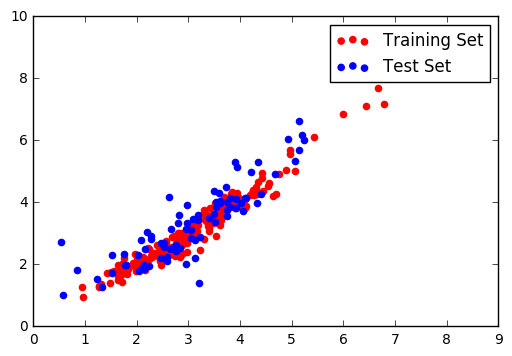

In [19]:
y_gp=gp.predict(training_set_M)
y_gp_test=gp.predict(test_set_M)
print 'standard error is ', np.std(y_gp-training_set_BG)
plt.scatter(y_gp,training_set_BG,color='r',label='Training Set')
plt.scatter(y_gp_test,test_set_BG,color='b',label='Test Set')
plt.legend()
plt.show()

# Problem Z

Comment on the amount of time this assignment required.

This assignment took me about 7 hours